<a href="https://colab.research.google.com/github/tasty-orange/ARN-labs/blob/main/ARN_PW3_Piemontesi_Trueb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Work 3 ARN - G.Piemontesi & G.Trueb

##Première expérience : Classification « awake » / « asleep »

Dans cette expérience, nous allons classifier les états « awake » (éveillé) et « asleep » (endormi) des souris en regroupant les phases n-rem et rem sous « asleep ». L'objectif est de créer un modèle MLP pour prédire ces deux états à partir des données EEG des souris. Nous évaluerons les performances du modèle à l'aide de la perte d'entraînement, de la validation, de la matrice de confusion et du F1-score.

### Import des packages/dépendances



In [1]:
import numpy as np

import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For history
import matplotlib.pyplot as plt

# For confusion matrix
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

### Import des données des souris

In [2]:
# Chargement des données d'entraînement
mice_eeg_1 = pd.read_csv('EEG_mouse_data_1.csv')
mice_eeg_2 = pd.read_csv('EEG_mouse_data_2.csv')

# Fusion des deux jeux de données d'entraînement
data_training = pd.concat([mice_eeg_1, mice_eeg_2])

# Chargement des données de test
data_test = pd.read_csv('EEG_mouse_data_test.csv')

###Preprocessing des données

Comme on peut le voir dans le diagramme en barres ci-dessous, nous avons trois états pour le sommeil des souris, et nous voulons n'en avoir que deux : 'awake' et 'asleep'.

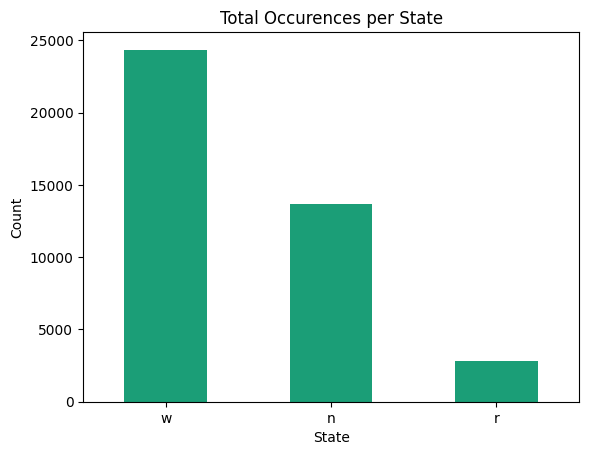

In [3]:
from collections import Counter

data_training.state.value_counts().plot(kind='bar', cmap='Dark2')
plt.title('Total Occurences per State')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.xlabel('State');

Modification du dataset pour fusionner les états 'n' et 'r' en un seul pour 'asleep', afin de n'avoir plus que les états 'awake' et 'asleep'.

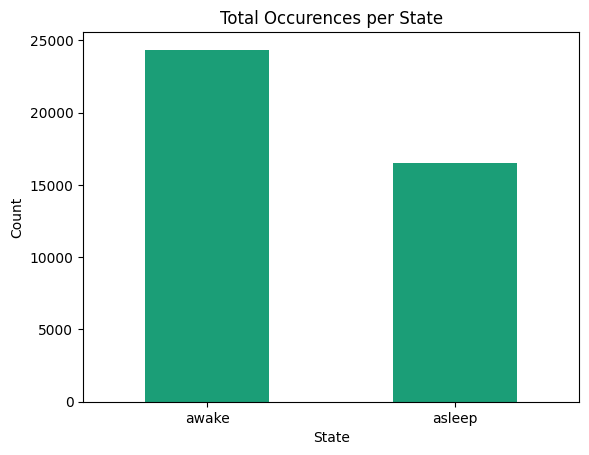

In [4]:
# Modifier la variable cible 'state' pour n'avoir que deux classes : 'awake' et 'asleep'
data_training['state'] = data_training['state'].replace({'w': 'awake', 'r': 'asleep', 'n': 'asleep'})

data_training.state.value_counts().plot(kind='bar', cmap='Dark2')
plt.title('Total Occurences per State')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.xlabel('State');

In [5]:
# Séparer les caractéristiques et la variable cible
input_data = data_training.drop('state', axis=1).values  # Suppression de la colonne 'state'
output_data = data_training['state'].values  # Variable cible 'state'

# Garder seulement les 25 premières caractéristiques
input_data = input_data[:, :25]


from sklearn.preprocessing import StandardScaler

# Normaliser les données d'entrée
scaler = StandardScaler()
input_data = scaler.fit_transform(input_data)


from sklearn.preprocessing import LabelEncoder

# Encoder la variable cible
encoder = LabelEncoder()
output_data = encoder.fit_transform(output_data)


In [9]:
from sklearn.model_selection import train_test_split

# Diviser les données en entraînement (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)


In [6]:
from keras.models import Sequential
from keras.layers import Dense

# Créer le modèle MLP
model = Sequential()

# Ajouter une couche d'entrée avec 25 neurones (en fonction du nombre de caractéristiques)
model.add(Dense(64, input_dim=25, activation='relu'))  # 64 neurones dans la première couche cachée
model.add(Dense(32, activation='relu'))  # 32 neurones dans la deuxième couche cachée

# Ajouter une couche de sortie avec 2 neurones (pour deux classes : 'awake' et 'asleep')
model.add(Dense(2, activation='softmax'))  # softmax pour classification multi-classes


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compiler le modèle
model.compile(loss='sparse_categorical_crossentropy',  # Utilisation de sparse_categorical_crossentropy pour classification avec LabelEncoder
              optimizer='adam',
              metrics=['accuracy'])


In [11]:
# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8397 - loss: 0.3579 - val_accuracy: 0.8856 - val_loss: 0.2910
Epoch 2/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8886 - loss: 0.2776 - val_accuracy: 0.8871 - val_loss: 0.2852
Epoch 3/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8971 - loss: 0.2623 - val_accuracy: 0.8899 - val_loss: 0.2858
Epoch 4/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8940 - loss: 0.2679 - val_accuracy: 0.8907 - val_loss: 0.2820
Epoch 5/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8969 - loss: 0.2632 - val_accuracy: 0.8894 - val_loss: 0.2801
Epoch 6/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8986 - loss: 0.2570 - val_accuracy: 0.8928 - val_loss: 0.2786
Epoch 7/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8998 - loss: 0.2511 - val_accuracy: 0.8911 - val_loss: 0.2821
Epoch 8/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9002 - loss: 0.2517 - 

In [12]:
# Prédictions sur les données de test
y_pred = model.predict(X_test)
# Comme la sortie du modèle est une probabilité, on prend la classe avec la probabilité la plus élevée
y_pred_classes = np.argmax(y_pred, axis=1)


256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


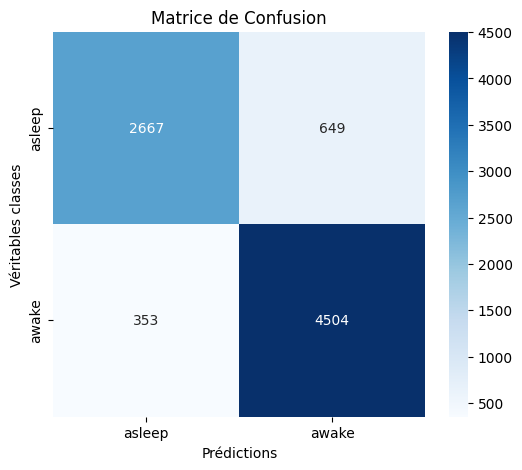

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Créer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Tracer la matrice de confusion avec un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables classes')
plt.show()
